In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Video
plt.style.use("/Users/tjwilli/jupyter.mplstyle")

In [2]:
Video("one_ball_simple.mp4")

In [2]:
def get_motion(tstop=10,dt=0.01):
    t = np.arange(0,tstop*np.sqrt(2),dt)
    v = np.zeros_like( t )
    y = np.zeros_like( t )
    y[0] = 1
    
    for i in range(1,t.size):
        v[i] = v[i-1] - dt
        y[i] = y[i-1] + v[i] * dt
        if y[i] <= 0:
            v[i] = -v[i-1]
            y[i] = y[i-1] + v[i] * dt
    return t,v,y

Text(0, 0.5, '$\\frac{y}{y_0}$')

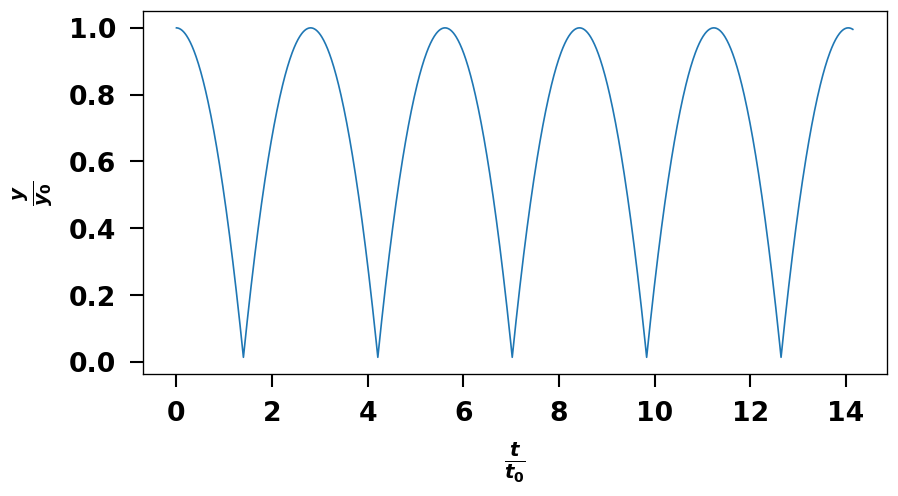

In [3]:
t,v,y = get_motion()
plt.plot(t,y)
plt.xlabel(r'$\frac{t}{t_0}$')
plt.ylabel(r'$\frac{y}{y_0}$')

Text(0, 0.5, '$\\frac{v}{v_0}$')

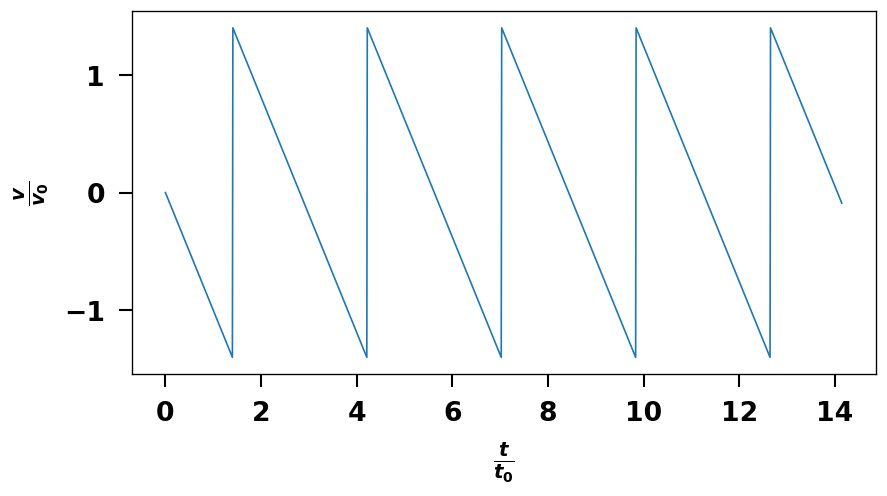

In [5]:
plt.plot(t,v)
plt.xlabel(r'$\frac{t}{t_0}$')
plt.ylabel(r'$\frac{v}{v_0}$')

In [6]:
Video("one_ball_phase.mp4")

In [7]:
Video("one_ball_phase_damped.mp4")

# What about two balls?

In [8]:
Video( "two_balls.mp4" )

In [9]:
Video("two_balls_r_2.mp4")

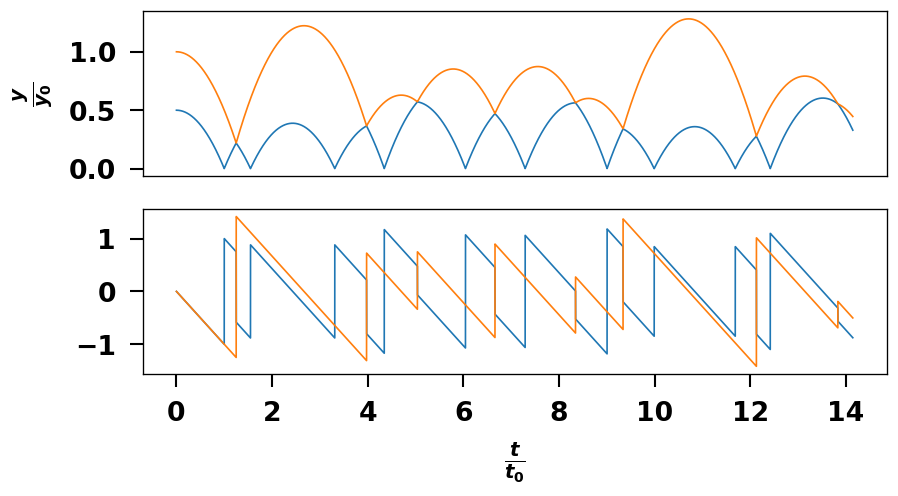

In [11]:
plot_motion(r=.5)

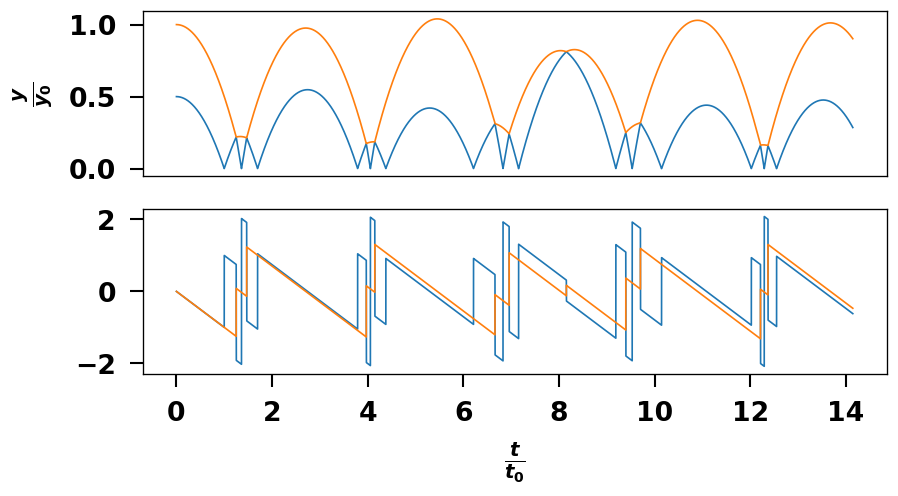

In [12]:
plot_motion(r=2)

In [13]:
Video("two_balls_r_05_phase.mp4")

In [14]:
Video("two_balls_r_05_poinc.mp4")

In [3]:
def collision(v10,v20,r,debug=False):
    v11 = ( (1-r)*v10 + 2*r*v20 ) / ( 1+r )
    v21 = ( 2 * v10 + (r-1)*v20 ) / ( 1+r )
    if debug:
        E0 = v10**2 + r * v20**2
        E1 = v11**2 + r * v21**2
        p0 = v10 + r * v20
        p1 = v11 + r * v21
        
        assert( np.abs(E1-E0) <= 1e-10 )
        assert( np.abs(p1-p0) <= 1e-10)
    return v11,v21


def get_energy(v1,v2,y1,y2,r):
    return ( 0.5*v1**2 + 0.5*v2**2 * r + y1 + r * y2 ) / ( 1+r ) 

def get_motion2(r=0.5,tstop=10,dt=0.01,radius=0.01,y0=[.5,1],debug=True ):
    t = np.arange(0,tstop*np.sqrt(2),dt)
    v1 = np.zeros_like( t )
    y1 = np.zeros_like( t )
    v2 = np.zeros_like( t )
    y2 = np.zeros_like( t )
    
    vponc = []
    yponc = []
    y1[0] = y0[0]
    y2[0] = y0[1]
    
    for i in range(1,t.size):
        if debug:eng = get_energy(v1[i-1],v2[i-1],y1[i-1],y2[i-1],r)
        if debug:print( "y1\ty2\tv1\tv2\tE (i={})".format(i) )
        if debug:print( "{:.4f}\t{:.4f}\t{:.4f}\t{:.4f}\t{:.4f}\t".format(y1[i-1],y2[i-1],v1[i-1],v2[i-1],eng) )
        v1[i] = v1[i-1] - dt
        y1[i] = y1[i-1] + v1[i] * dt
        
        v2[i] = v2[i-1] - dt
        y2[i] = y2[i-1] + v2[i] * dt
        
        wall = False
        #If lower ball collides with wall
        if (y1[i] <= radius) and (v1[i] < 0):
            vponc.append( v2[i] )
            yponc.append( y2[i] )
            wall = True
            if debug:print( "\tWall collision" )
            if debug:print( "\t{:.4f}\t{:.4f}".format(y1[i],v1[i]) )
            v1[i] = -v1[i-1]
            y1[i] = y1[i-1] + v1[i] * dt
            if debug:print( "\t{:.4f}\t{:.4f}".format(y1[i],v1[i]) )
            
        if y2[i] - y1[i] <= radius:
            if debug:print( "\tBall collision" )
            if debug:print( "\ty1\ty2\tv1\tv2\tE (i={})".format(i) )
            if debug:print( "\t{:.4f}\t{:.4f}\t{:.4f}\t{:.4f}\t{:.4f}\t".format(y1[i],y2[i],v1[i],v2[i],eng) )
            v1i = v1[i-1]
            v2i = v2[i-1]
            if wall:
                v1i = v1[i]
            v11,v21 = collision(v1i,v2i,r,debug=debug)
            v1[i] = v11
            v2[i] = v21
            y1[i] = y1[i-1] + v1[i] * dt
            y2[i] = y2[i-1] + v2[i] * dt
            if debug:print( "\t{:.4f}\t{:.4f}\t{:.4f}\t{:.4f}\t{:.4f}\t".format(y1[i],y2[i],v1[i],v2[i],eng) )
        
    return t,v1,v2,y1,y2,vponc,yponc


def plot_motion(r=1,dt=0.001,radius=0,tstop=10):
    t,v1,v2,y1,y2,v,y = get_motion2(dt=dt,radius=radius,tstop=tstop,r=r,debug=0)
    plt.subplot(2,1,1)
    plt.plot(t,y1)
    plt.plot(t,y2)
    plt.ylabel(r'$\frac{y}{y_0}$')
    plt.gca().xaxis.set_visible(False)
    plt.subplot(2,1,2)
    plt.plot(t,v1)
    plt.plot(t,v2)
    plt.xlabel(r'$\frac{t}{t_0}$')

In [42]:
r = 1
t,v1,v2,y1,y2,v,y = get_motion2(dt=.001,radius=.0,tstop=50,r=r,debug=0)

Text(0, 0.5, '$\\frac{y}{y_0}$')

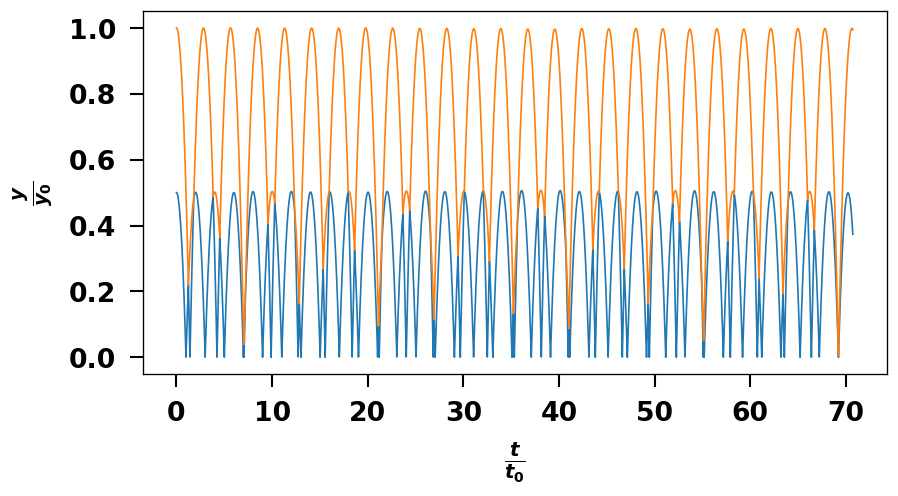

In [43]:
plt.plot(t,y1,label='ball1')
plt.plot(t,y2,label='ball2')
plt.xlabel(r'$\frac{t}{t_0}$')
plt.ylabel(r'$\frac{y}{y_0}$')
#plt.legend(loc='upper right')
#plt.savefig('two_balls.pdf')

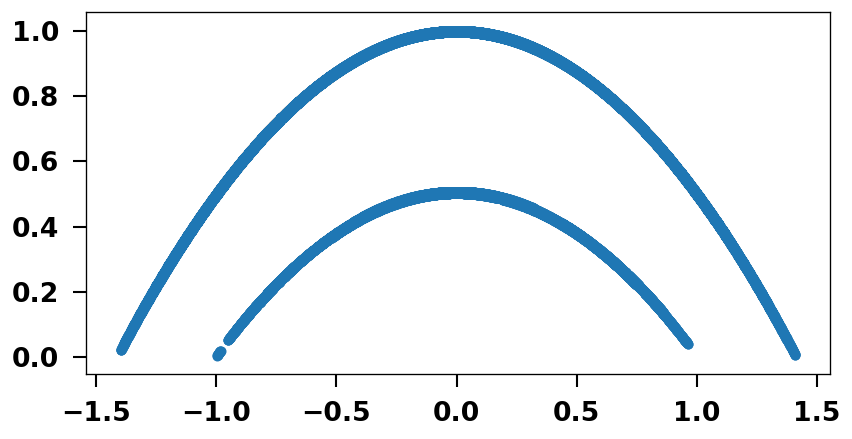

In [44]:
plt.scatter(v2,y2)

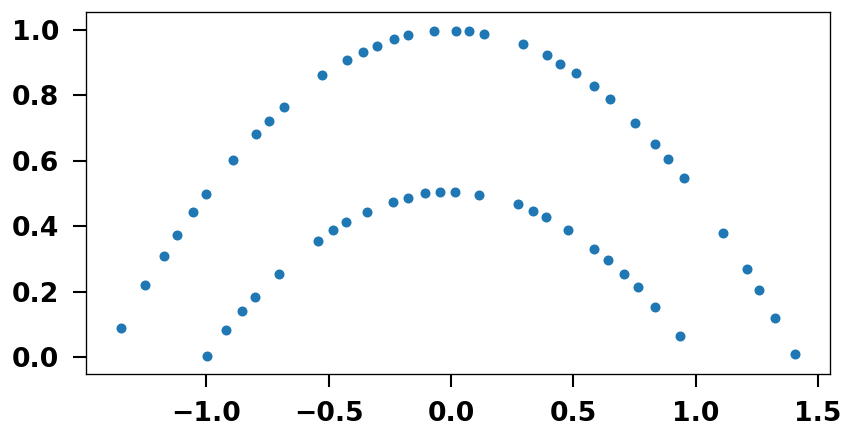

In [45]:
plt.scatter(v,y)

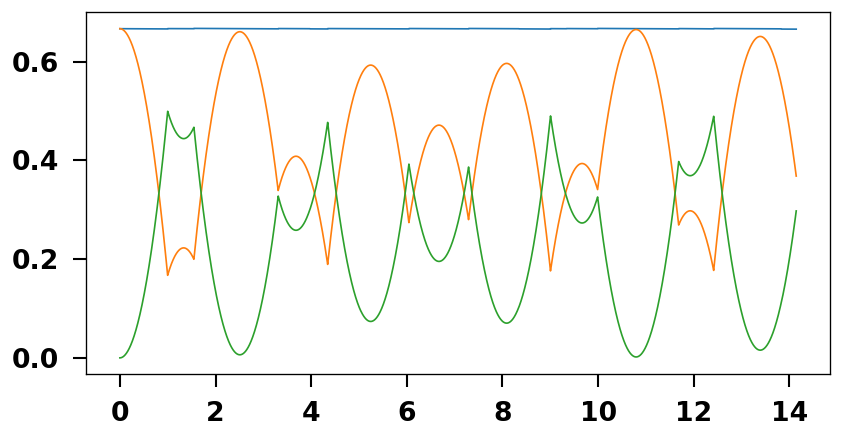

In [32]:
eng = (.5*(v1**2+v2**2*r) + y1+y2*r)/(r+1)
u = (y1 + y2 * r) / (r+1)
k = (.5*(v1**2+v2**2*r))/(r+1)
plt.plot(t,eng)
plt.plot(t,u)
plt.plot(t,k)

In [ ]:
plt.plot(t,eng/eng[0])
plt.ylim(0,1.1)

In [ ]:
v10 = np.random.uniform(-10,10)
v20 = np.random.uniform(-10,10)
r = np.random.uniform(0.01,10)
v11,v21 = collision(v10,v20,r)
E0 = v10**2+v20**2*r
E1 = v11**2+v21**2*r
p0 = v10 + v20*r
p1 = v11 + v21*r
print(E0,E1)
print(p0,p1)

In [ ]:
def collision_test(m1,v10,m2,v20):
    v11 = (m1-m2)/(m1+m2)*v10 + 2*m2*v20/(m1+m2)
    v21 = (2*m1*v10)/(m1+m2) + (m2-m1)*v20/(m1+m2)
    return v11,v21
def collision_test2(v10,v20,r):
    m1 = 1/(r+1)
    m2 = r/(r+1)
    v11 = (m1-m2)/(m1+m2)*v10 + 2*m2*v20/(m1+m2)
    v21 = (2*m1*v10)/(m1+m2) + (m2-m1)*v20/(m1+m2)
    return v11,v21

In [ ]:
m1 = np.random.uniform(0.01,10)
m2 = np.random.uniform(0.01,10)
v10 = np.random.uniform(-10,10)
v20 = np.random.uniform(-10,10)
v11,v21 = collision_test(m1,v10,m2,v20)
dE = m1*v10**2+m2*v20**2-m1*v11**2-m2*v21**2
dp = m1*v10 + m2*v20 - m1*v11 - m2*v21
print(dE,dp)

In [ ]:
m1 = np.random.uniform(0.01,10)
m2 = np.random.uniform(0.01,10)
v10 = np.random.uniform(-10,10)
v20 = np.random.uniform(-10,10)
r = m2/m1
v11,v21 = collision_test2(v10,v20,r)
E0 = v10**2+v20**2*r
E1 = v11**2+v21**2*r
p0 = v10 + v20*r
p1 = v11 + v21*r
print(E0,E1)
print(p0,p1)

In [ ]:
[1,2,3].index(3)

In [ ]:
def get_motion(tstop=10,dt=0.01):
    t = np.arange(0,tstop*np.sqrt(2),dt)
    v = np.zeros_like( t )
    y = np.zeros_like( t )
    y[0] = 1
    
    for i in range(1,t.size):
        v[i] = v[i-1] - dt - 1* np.abs( v[i-1] ) * v[i-1] * dt
        y[i] = y[i-1] + v[i] * dt
        if y[i] <= 0:
            v[i] = -v[i-1]
            y[i] = y[i-1] + v[i] * dt
    return t,v,y

In [ ]:
t,v,y = get_motion()

In [ ]:
plt.plot(t,y)